In [78]:
import os

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

import cv2

In [79]:
df = pd.read_csv('./clean_ds.csv')

In [80]:
df.head()

,role,level,degree,link,job_title,company,company_url,location,salary,job_type,...,kafka,java,excel,scikit-learn,sklearn,r,scala,stata,spss,sas
0,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ab2aea441ea1e...,Business Intelligence Analyst,UCHealth,https://www.indeed.com/cmp/Uchealth-2,"Location\n2500 Rocky Mountain Avenue, Loveland...",31.61 - 47.41,Full-time,...,0,0,0,0,0,0,0,0,0,0
1,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=45359086e0c5b...,Business Research Analyst,Schweitzer Engineering Laboratories,https://www.indeed.com/cmp/Schweitzer-Engineer...,"Location\nPullman, WA\n&nbsp;",58200 - 91200,Full-time,...,0,0,0,0,0,0,0,0,0,0
2,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=bfde32d85c230...,Technical Business Analyst,Fisher Investments,https://www.indeed.com/cmp/Fisher-Investments,"Location\nCamas, WA\n&nbsp;",85000 - 130000,Full-time,...,0,0,1,0,0,0,1,0,0,0
3,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=e0f617350b0ec...,"Business Analyst, Jr",Tista Science and Technology Corporation,https://www.indeed.com/cmp/Tista-Science-and-T...,Location\nRemote\n&nbsp;,38145 - 61625,Full-time,...,0,0,1,0,0,0,0,0,0,0
4,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ff79324cd280b...,BUSINESS SYSTEMS ANALYST,The State of New Hampshire,https://www.indeed.com/cmp/State-of-New-Hampshire,"Location\n7 Hazen Drive, Concord, NH\n&nbsp;",30.72 - 41.76,Full-time,...,0,0,1,0,0,0,0,0,0,0


In [81]:
df['ceo_approve_percentage'].replace(0,np.nan,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25516\84215671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ceo_approve_percentage'].replace(0,np.nan,inplace=True)


In [82]:
df['ceo_approve_percentage'].isnull().sum()

4545

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   role                          11290 non-null  object 
 1   level                         11290 non-null  object 
 2   degree                        11290 non-null  object 
 3   link                          11290 non-null  object 
 4   job_title                     11290 non-null  object 
 5   company                       11290 non-null  object 
 6   company_url                   11290 non-null  object 
 7   location                      11290 non-null  object 
 8   salary                        11290 non-null  object 
 9   job_type                      7700 non-null   object 
 10  benefits                      11290 non-null  object 
 11  description                   11289 non-null  object 
 12  cname                         11289 non-null  object 
 13  r

In [84]:
all_columns_list = df.columns.to_list()
all_columns_list

['role',
 'level',
 'degree',
 'link',
 'job_title',
 'company',
 'company_url',
 'location',
 'salary',
 'job_type',
 'benefits',
 'description',
 'cname',
 'ratings',
 'review_count',
 'review_link',
 'company_size',
 'company_revenue',
 'company_industry',
 'company_headquarters_clipped',
 'company_headquarters_full',
 'ceo_name',
 'ceo_approve_percentage',
 'company_founded',
 'company_website_url',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'salary_type',
 'min_salary',
 'max_salary',
 'min_revenue',
 'max_revenue',
 'min_max_revenue',
 'python',
 'mysql',
 'postgresql',
 'tensorflow',
 'pytorch',
 'aws',
 'tableau',
 'powerbi',
 'hadoop',
 'kafka',
 'java',
 'excel',
 'scikit-learn',
 'sklearn',
 ' r ',
 'scala',
 'stata',
 'spss',
 'sas']

In [85]:
skills = ['python',
 'mysql',
 'postgresql',
 'tensorflow',
 'pytorch',
 'aws',
 'tableau',
 'powerbi',
 'hadoop',
 'kafka',
 'java',
 'excel',
 'scikit-learn',
 'sklearn',
 ' r ',
 'scala',
 'stata',
 'spss',
 'sas']

In [86]:

df.drop(columns=skills,inplace=True)

In [87]:
df

,role,level,degree,link,job_title,company,company_url,location,salary,job_type,...,Compensation,Management,Trust,Belonging,salary_type,min_salary,max_salary,min_revenue,max_revenue,min_max_revenue
0,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ab2aea441ea1e...,Business Intelligence Analyst,UCHealth,https://www.indeed.com/cmp/Uchealth-2,"Location\n2500 Rocky Mountain Avenue, Loveland...",31.61 - 47.41,Full-time,...,3.0,3.0,4.0,3.0,hour,60691.2,91027.2,NaN,NaN,Not Mentioned
1,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=45359086e0c5b...,Business Research Analyst,Schweitzer Engineering Laboratories,https://www.indeed.com/cmp/Schweitzer-Engineer...,"Location\nPullman, WA\n&nbsp;",58200 - 91200,Full-time,...,5.0,4.0,4.0,4.0,year,58200.0,91200.0,1B,5B,1B-5B
2,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=bfde32d85c230...,Technical Business Analyst,Fisher Investments,https://www.indeed.com/cmp/Fisher-Investments,"Location\nCamas, WA\n&nbsp;",85000 - 130000,Full-time,...,4.0,3.0,2.0,2.0,year,85000.0,130000.0,NaN,NaN,Not Mentioned
3,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=e0f617350b0ec...,"Business Analyst, Jr",Tista Science and Technology Corporation,https://www.indeed.com/cmp/Tista-Science-and-T...,Location\nRemote\n&nbsp;,38145 - 61625,Full-time,...,NaN,NaN,NaN,NaN,year,38145.0,61625.0,100M,500M,100M-500M
4,business analyst,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ff79324cd280b...,BUSINESS SYSTEMS ANALYST,The State of New Hampshire,https://www.indeed.com/cmp/State-of-New-Hampshire,"Location\n7 Hazen Drive, Concord, NH\n&nbsp;",30.72 - 41.76,Full-time,...,2.0,3.0,2.0,2.0,hour,58982.4,80179.2,NaN,NaN,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,machine_learning_engineer,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=6078f1a23fe6f...,Data Architect,Intone Networks,https://www.indeed.com/cmp/Intone-Networks,Location\nArizona\n&nbsp;,No Salary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M,25M,5M-25M
11286,machine_learning_engineer,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=09f289b51743a...,Software Engineer,Cisco Systems,https://www.indeed.com/cmp/Cisco,"Location\nSan Jose, CA\n&nbsp;",No Salary,Full-time,...,5.0,5.0,5.0,5.0,NaN,NaN,NaN,10B,10B,>10B
11287,machine_learning_engineer,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=9b5fba4325f35...,"Engineering Manager, MLOps- San Antonio, Austi...",H-E-B,https://www.indeed.com/cmp/Heb,"Location\n3890 W Northwest Hwy Ste 300, Dallas...",No Salary,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10B,10B,>10B
11288,machine_learning_engineer,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=086f4cc74e3a8...,Lead Cloud Engineer (Work from Home),Transamerica,https://www.indeed.com/cmp/Transamerica,Location\nRemote\n&nbsp;,120000 - 136000,Full-time,...,3.0,3.0,3.0,3.0,year,120000.0,136000.0,NaN,NaN,Not Mentioned


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   role                          11290 non-null  object 
 1   level                         11290 non-null  object 
 2   degree                        11290 non-null  object 
 3   link                          11290 non-null  object 
 4   job_title                     11290 non-null  object 
 5   company                       11290 non-null  object 
 6   company_url                   11290 non-null  object 
 7   location                      11290 non-null  object 
 8   salary                        11290 non-null  object 
 9   job_type                      7700 non-null   object 
 10  benefits                      11290 non-null  object 
 11  description                   11289 non-null  object 
 12  cname                         11289 non-null  object 
 13  r

In [89]:
all_columns_list

['role',
 'level',
 'degree',
 'link',
 'job_title',
 'company',
 'company_url',
 'location',
 'salary',
 'job_type',
 'benefits',
 'description',
 'cname',
 'ratings',
 'review_count',
 'review_link',
 'company_size',
 'company_revenue',
 'company_industry',
 'company_headquarters_clipped',
 'company_headquarters_full',
 'ceo_name',
 'ceo_approve_percentage',
 'company_founded',
 'company_website_url',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'salary_type',
 'min_salary',
 'max_salary',
 'min_revenue',
 'max_revenue',
 'min_max_revenue',
 'python',
 'mysql',
 'postgresql',
 'tensorflow',
 'pytorch',
 'aws',
 'tableau',
 'powerbi',
 'hadoop',
 'kafka',
 'java',
 'excel',
 'scikit-learn',
 'sklearn',
 ' r ',
 'scala',
 'stata',
 'spss',
 'sas']

In [90]:
cols_to_take = [

    'company_url',
 'ratings',
 'review_count',
  'company_size',
 'company_revenue',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue']

In [91]:
to_predict_df = df[cols_to_take]

In [92]:
to_predict_df

,company_url,ratings,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,https://www.indeed.com/cmp/Uchealth-2,3.7,1200.0,>10000,Not Mentioned,Healthcare,80.0,2006.0,71.0,Average,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,Not Mentioned
1,https://www.indeed.com/cmp/Schweitzer-Engineer...,3.9,272.0,1001-5000,1B-5B,Manufacturing,NaN,1984.0,74.0,Above average,...,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,1B-5B
2,https://www.indeed.com/cmp/Fisher-Investments,3.5,186.0,1001-5000,Not Mentioned,Investment & Asset Management,67.0,1979.0,65.0,Below average,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,Not Mentioned
3,https://www.indeed.com/cmp/Tista-Science-and-T...,3.7,47.0,201-500,100M-500M,Information Technology,82.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100M-500M
4,https://www.indeed.com/cmp/State-of-New-Hampshire,3.8,186.0,5001-10000,Not Mentioned,State & Regional Agencies,NaN,1950.0,67.0,Below average,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,https://www.indeed.com/cmp/Intone-Networks,4.1,18.0,201-500,5M-25M,Information Technology Support Services,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M-25M
11286,https://www.indeed.com/cmp/Cisco,4.1,6500.0,>10000,>10B,Information Technology,85.0,1984.0,77.0,High,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,>10B
11287,https://www.indeed.com/cmp/Heb,4.2,11300.0,>10000,>10B,Grocery Stores,92.0,1905.0,75.0,Above average,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>10B
11288,https://www.indeed.com/cmp/Transamerica,3.5,1600.0,Not Mentioned,Not Mentioned,NaN,NaN,NaN,68.0,Below average,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,Not Mentioned


In [93]:
to_predict_df

,company_url,ratings,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,https://www.indeed.com/cmp/Uchealth-2,3.7,1200.0,>10000,Not Mentioned,Healthcare,80.0,2006.0,71.0,Average,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,Not Mentioned
1,https://www.indeed.com/cmp/Schweitzer-Engineer...,3.9,272.0,1001-5000,1B-5B,Manufacturing,NaN,1984.0,74.0,Above average,...,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,1B-5B
2,https://www.indeed.com/cmp/Fisher-Investments,3.5,186.0,1001-5000,Not Mentioned,Investment & Asset Management,67.0,1979.0,65.0,Below average,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,Not Mentioned
3,https://www.indeed.com/cmp/Tista-Science-and-T...,3.7,47.0,201-500,100M-500M,Information Technology,82.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100M-500M
4,https://www.indeed.com/cmp/State-of-New-Hampshire,3.8,186.0,5001-10000,Not Mentioned,State & Regional Agencies,NaN,1950.0,67.0,Below average,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,https://www.indeed.com/cmp/Intone-Networks,4.1,18.0,201-500,5M-25M,Information Technology Support Services,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M-25M
11286,https://www.indeed.com/cmp/Cisco,4.1,6500.0,>10000,>10B,Information Technology,85.0,1984.0,77.0,High,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,>10B
11287,https://www.indeed.com/cmp/Heb,4.2,11300.0,>10000,>10B,Grocery Stores,92.0,1905.0,75.0,Above average,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>10B
11288,https://www.indeed.com/cmp/Transamerica,3.5,1600.0,Not Mentioned,Not Mentioned,NaN,NaN,NaN,68.0,Below average,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,Not Mentioned


In [94]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_url             11290 non-null  object 
 1   ratings                 10103 non-null  float64
 2   review_count            11290 non-null  float64
 3   company_size            11290 non-null  object 
 4   company_revenue         11290 non-null  object 
 5   company_industry        9878 non-null   object 
 6   ceo_approve_percentage  6745 non-null   float64
 7   company_founded         8265 non-null   float64
 8   Average_rating_score    6885 non-null   float64
 9   Average_rating          6885 non-null   object 
 10  Happiness               6747 non-null   float64
 11  Stress-free             6747 non-null   float64
 12  Purpose                 6747 non-null   float64
 13  Satisfaction            6747 non-null   float64
 14  Flexibility             6556 non-null 

In [95]:
to_predict_df

,company_url,ratings,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,https://www.indeed.com/cmp/Uchealth-2,3.7,1200.0,>10000,Not Mentioned,Healthcare,80.0,2006.0,71.0,Average,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,Not Mentioned
1,https://www.indeed.com/cmp/Schweitzer-Engineer...,3.9,272.0,1001-5000,1B-5B,Manufacturing,NaN,1984.0,74.0,Above average,...,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,1B-5B
2,https://www.indeed.com/cmp/Fisher-Investments,3.5,186.0,1001-5000,Not Mentioned,Investment & Asset Management,67.0,1979.0,65.0,Below average,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,Not Mentioned
3,https://www.indeed.com/cmp/Tista-Science-and-T...,3.7,47.0,201-500,100M-500M,Information Technology,82.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100M-500M
4,https://www.indeed.com/cmp/State-of-New-Hampshire,3.8,186.0,5001-10000,Not Mentioned,State & Regional Agencies,NaN,1950.0,67.0,Below average,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,Not Mentioned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,https://www.indeed.com/cmp/Intone-Networks,4.1,18.0,201-500,5M-25M,Information Technology Support Services,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M-25M
11286,https://www.indeed.com/cmp/Cisco,4.1,6500.0,>10000,>10B,Information Technology,85.0,1984.0,77.0,High,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,>10B
11287,https://www.indeed.com/cmp/Heb,4.2,11300.0,>10000,>10B,Grocery Stores,92.0,1905.0,75.0,Above average,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>10B
11288,https://www.indeed.com/cmp/Transamerica,3.5,1600.0,Not Mentioned,Not Mentioned,NaN,NaN,NaN,68.0,Below average,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,Not Mentioned


In [96]:
to_predict_df['company_url'].nunique()

4997

In [97]:
to_predict_df.drop_duplicates(subset='company_url',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25516\2842627874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df.drop_duplicates(subset='company_url',inplace=True)


In [98]:
to_predict_df.shape

(4997, 26)

In [99]:
to_predict_df.shape

(4997, 26)

In [100]:
df.iloc[:,1:-1]

,level,degree,link,job_title,company,company_url,location,salary,job_type,benefits,...,Energy,Compensation,Management,Trust,Belonging,salary_type,min_salary,max_salary,min_revenue,max_revenue
0,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ab2aea441ea1e...,Business Intelligence Analyst,UCHealth,https://www.indeed.com/cmp/Uchealth-2,"Location\n2500 Rocky Mountain Avenue, Loveland...",31.61 - 47.41,Full-time,"['403(b) matching', 'Continuing education cred...",...,3.0,3.0,3.0,4.0,3.0,hour,60691.2,91027.2,NaN,NaN
1,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=45359086e0c5b...,Business Research Analyst,Schweitzer Engineering Laboratories,https://www.indeed.com/cmp/Schweitzer-Engineer...,"Location\nPullman, WA\n&nbsp;",58200 - 91200,Full-time,"['401(k)', 'Disability insurance', 'Employee s...",...,4.0,5.0,4.0,4.0,4.0,year,58200.0,91200.0,1B,5B
2,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=bfde32d85c230...,Technical Business Analyst,Fisher Investments,https://www.indeed.com/cmp/Fisher-Investments,"Location\nCamas, WA\n&nbsp;",85000 - 130000,Full-time,"['401(k) matching', 'Adoption assistance', 'Ca...",...,1.0,4.0,3.0,2.0,2.0,year,85000.0,130000.0,NaN,NaN
3,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=e0f617350b0ec...,"Business Analyst, Jr",Tista Science and Technology Corporation,https://www.indeed.com/cmp/Tista-Science-and-T...,Location\nRemote\n&nbsp;,38145 - 61625,Full-time,"['401(k) matching', 'Disability insurance', 'E...",...,NaN,NaN,NaN,NaN,NaN,year,38145.0,61625.0,100M,500M
4,entry_level,bachalors,https://www.indeed.com/rc/clk?jk=ff79324cd280b...,BUSINESS SYSTEMS ANALYST,The State of New Hampshire,https://www.indeed.com/cmp/State-of-New-Hampshire,"Location\n7 Hazen Drive, Concord, NH\n&nbsp;",30.72 - 41.76,Full-time,"['457(b)', 'Childcare', 'Flexible schedule', '...",...,2.0,2.0,3.0,2.0,2.0,hour,58982.4,80179.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=6078f1a23fe6f...,Data Architect,Intone Networks,https://www.indeed.com/cmp/Intone-Networks,Location\nArizona\n&nbsp;,No Salary,NaN,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5M,25M
11286,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=09f289b51743a...,Software Engineer,Cisco Systems,https://www.indeed.com/cmp/Cisco,"Location\nSan Jose, CA\n&nbsp;",No Salary,Full-time,"['401(k)', '401(k) matching', 'Dental insuranc...",...,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,10B,10B
11287,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=9b5fba4325f35...,"Engineering Manager, MLOps- San Antonio, Austi...",H-E-B,https://www.indeed.com/cmp/Heb,"Location\n3890 W Northwest Hwy Ste 300, Dallas...",No Salary,Full-time,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10B,10B
11288,Mid_level,bachalors,https://www.indeed.com/rc/clk?jk=086f4cc74e3a8...,Lead Cloud Engineer (Work from Home),Transamerica,https://www.indeed.com/cmp/Transamerica,Location\nRemote\n&nbsp;,120000 - 136000,Full-time,"['401(k) matching', 'Adoption assistance', 'De...",...,2.0,3.0,3.0,3.0,3.0,year,120000.0,136000.0,NaN,NaN


In [101]:
to_predict_df.isnull().sum()

company_url                  0
ratings                    904
review_count                 0
company_size                 0
company_revenue              0
company_industry          1035
ceo_approve_percentage    3114
company_founded           2101
Average_rating_score      2748
Average_rating            2748
Happiness                 2854
Stress-free               2854
Purpose                   2854
Satisfaction              2854
Flexibility               2912
Achievement               2917
Learning                  2912
Inclusion                 2912
Support                   2911
Appreciation              2911
Energy                    2917
Compensation              2911
Management                2912
Trust                     2911
Belonging                 2911
min_max_revenue              0
dtype: int64

In [102]:
to_predict_df.select_dtypes('number').corr()

,ratings,review_count,ceo_approve_percentage,company_founded,Average_rating_score,Happiness,Stress-free,Purpose,Satisfaction,Flexibility,Achievement,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging
ratings,1.000000,0.003187,0.779950,-0.193506,0.747853,0.747486,0.413592,0.713284,0.712419,0.606712,0.684719,0.714511,0.708038,0.695189,0.702626,0.719642,0.505259,0.683306,0.740164,0.751575
review_count,0.003187,1.000000,-0.019242,-0.065627,-0.037526,-0.019517,-0.071078,-0.026317,-0.024098,-0.068979,-0.015803,-0.023621,0.003195,-0.019139,-0.022574,-0.002144,-0.028858,-0.007466,-0.003824,-0.013393
ceo_approve_percentage,0.779950,-0.019242,1.000000,-0.179349,0.592195,0.597063,0.282891,0.585542,0.603807,0.513517,0.550623,0.618293,0.622883,0.616180,0.610705,0.561461,0.456329,0.575461,0.646513,0.627134
company_founded,-0.193506,-0.065627,-0.179349,1.000000,-0.172872,-0.196342,-0.068416,-0.206573,-0.162760,-0.096885,-0.183961,-0.221008,-0.145068,-0.171014,-0.185686,-0.194224,-0.076680,-0.173515,-0.181858,-0.194442
Average_rating_score,0.747853,-0.037526,0.592195,-0.172872,1.000000,0.907916,0.681983,0.883789,0.891637,0.744133,0.827634,0.808415,0.818048,0.809803,0.829348,0.883123,0.568005,0.805546,0.849280,0.876711
Happiness,0.747486,-0.019517,0.597063,-0.196342,0.907916,1.000000,0.542085,0.859253,0.842847,0.745329,0.835864,0.817653,0.835486,0.827254,0.844908,0.891684,0.553985,0.827776,0.862329,0.897864
Stress-free,0.413592,-0.071078,0.282891,-0.068416,0.681983,0.542085,1.000000,0.449024,0.503376,0.449815,0.493553,0.396745,0.420197,0.400297,0.425720,0.538245,0.313607,0.418067,0.441287,0.484458
Purpose,0.713284,-0.026317,0.585542,-0.206573,0.883789,0.859253,0.449024,1.000000,0.824563,0.692655,0.791578,0.819325,0.795384,0.797709,0.816509,0.845629,0.500275,0.784909,0.826131,0.855467
Satisfaction,0.712419,-0.024098,0.603807,-0.162760,0.891637,0.842847,0.503376,0.824563,1.000000,0.707320,0.773293,0.771925,0.807620,0.773724,0.796598,0.801017,0.589017,0.765309,0.827704,0.837784
Flexibility,0.606712,-0.068979,0.513517,-0.096885,0.744133,0.745329,0.449815,0.692655,0.707320,1.000000,0.702986,0.686648,0.787483,0.756730,0.755869,0.709649,0.463039,0.737806,0.773178,0.760028


In [103]:
to_predict_df['ratings'].describe()

count    4093.000000
mean        3.619717
std         0.608340
min         1.000000
25%         3.300000
50%         3.700000
75%         4.000000
max         5.000000
Name: ratings, dtype: float64

In [104]:
to_predict_df.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25516\94811522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df.dropna(inplace=True)


In [105]:
to_predict_df

,company_url,ratings,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,https://www.indeed.com/cmp/Uchealth-2,3.7,1200.0,>10000,Not Mentioned,Healthcare,80.0,2006.0,71.0,Average,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,Not Mentioned
2,https://www.indeed.com/cmp/Fisher-Investments,3.5,186.0,1001-5000,Not Mentioned,Investment & Asset Management,67.0,1979.0,65.0,Below average,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,Not Mentioned
5,https://www.indeed.com/cmp/Pathward-1,3.3,42.0,1001-5000,100M-500M,Banking & Lending,69.0,1954.0,68.0,Below average,...,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,100M-500M
6,https://www.indeed.com/cmp/Asg-962b1950,3.0,74.0,501-1000,Not Mentioned,Telecommunications,66.0,2008.0,69.0,Average,...,3.0,4.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,Not Mentioned
8,https://www.indeed.com/cmp/Adobe,4.3,822.0,>10000,5B-10B,Computer Hardware Development,91.0,1982.0,78.0,High,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5B-10B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,https://www.indeed.com/cmp/Allstate-Insurance,3.6,10200.0,>10000,>10B,Insurance,72.0,1931.0,68.0,Below average,...,4.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,>10B
11100,https://www.indeed.com/cmp/Altria,4.0,629.0,5001-10000,>10B,Consumer Product Manufacturing,82.0,1919.0,74.0,Above average,...,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,>10B
11125,https://www.indeed.com/cmp/Aaa-Washington,3.2,119.0,501-1000,Not Mentioned,Travel Agencies,73.0,1904.0,66.0,Below average,...,2.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,Not Mentioned
11135,https://www.indeed.com/cmp/Helen-of-Troy,3.4,252.0,1001-5000,1B-5B,Consumer Product Manufacturing,74.0,1968.0,74.0,Above average,...,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,1B-5B


In [106]:
to_predict_df['company_url'].nunique()

1238

In [107]:
to_predict_df['ratings'].describe()

count    1238.000000
mean        3.588449
std         0.375960
min         1.700000
25%         3.400000
50%         3.600000
75%         3.900000
max         4.500000
Name: ratings, dtype: float64

<Axes: >

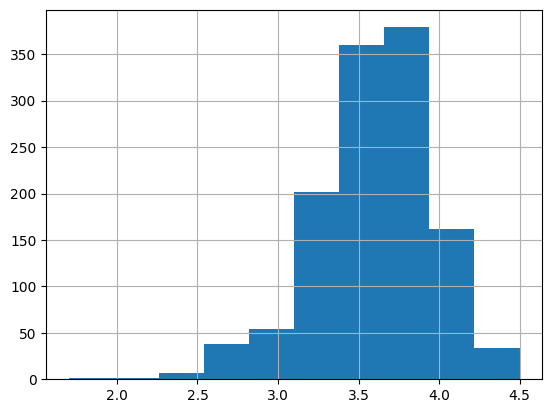

In [108]:
to_predict_df['ratings'].hist()

In [109]:
low_threshold = 3.5
high_threshold = 4.0
# Categorize ratings into classes
def categorize_rating(rating):
    if rating < low_threshold:
        return 0
    elif rating < high_threshold:
        return 1
    else:
        return 2

# Add a new column 'class' to df based on the categorization
to_predict_df['rating_class'] = to_predict_df['ratings'].apply(categorize_rating)

C:\Users\user\AppData\Local\Temp\ipykernel_25516\939054026.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['rating_class'] = to_predict_df['ratings'].apply(categorize_rating)


In [110]:
to_predict_df["rating_class"].value_counts()

rating_class
1    634
0    408
2    196
Name: count, dtype: int64

In [111]:
to_predict_df.columns.to_list()

['company_url',
 'ratings',
 'review_count',
 'company_size',
 'company_revenue',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue',
 'rating_class']

In [112]:
to_predict_df.drop(columns=['ratings','company_url'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25516\3719093848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df.drop(columns=['ratings','company_url'],inplace=True)


In [113]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 11181
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_count            1238 non-null   float64
 1   company_size            1238 non-null   object 
 2   company_revenue         1238 non-null   object 
 3   company_industry        1238 non-null   object 
 4   ceo_approve_percentage  1238 non-null   float64
 5   company_founded         1238 non-null   float64
 6   Average_rating_score    1238 non-null   float64
 7   Average_rating          1238 non-null   object 
 8   Happiness               1238 non-null   float64
 9   Stress-free             1238 non-null   float64
 10  Purpose                 1238 non-null   float64
 11  Satisfaction            1238 non-null   float64
 12  Flexibility             1238 non-null   float64
 13  Achievement             1238 non-null   float64
 14  Learning                1238 non-null   floa

In [114]:
to_predict_df.columns.to_list()

['review_count',
 'company_size',
 'company_revenue',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue',
 'rating_class']

In [115]:
feat_list = ['review_count',
 'company_size',
  'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue']

In [116]:
to_predict_df['company_size'].replace({
    '>10000' : "Greater than 10000",
    '1001-5000':'within 10001-5000',
    '5001-10000':'within 5001-10000',
    '501-1000':'within 501-100',
    '201-500':'within 201-500',
    '51-200':'within 51-200',
    '11-50' : 'within 11-50',
    '<10':'less than 10'
},inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25516\2517185331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to_predict_df['company_size'].replace({
C:\Users\user\AppData\Local\Temp\ipykernel_25516\2517185331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['company_size'].replace({


In [117]:
cols_object = to_predict_df.select_dtypes('object').columns.to_list()
for col in cols_object:
    to_predict_df[col] = to_predict_df[col].astype('category')

C:\Users\user\AppData\Local\Temp\ipykernel_25516\2366768264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df[col] = to_predict_df[col].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_25516\2366768264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df[col] = to_predict_df[col].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_25516\2366768264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [118]:
cols_object

['company_size',
 'company_revenue',
 'company_industry',
 'Average_rating',
 'min_max_revenue']

In [119]:
label_encoder = LabelEncoder()
to_predict_df['company_size'] = label_encoder.fit_transform(to_predict_df['company_size'])


C:\Users\user\AppData\Local\Temp\ipykernel_25516\2544420208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['company_size'] = label_encoder.fit_transform(to_predict_df['company_size'])


In [120]:

to_predict_df['company_industry'] = label_encoder.fit_transform(to_predict_df['company_industry'])
to_predict_df['Average_rating'] = label_encoder.fit_transform(to_predict_df['Average_rating'])
to_predict_df['min_max_revenue'] = label_encoder.fit_transform(to_predict_df['min_max_revenue'])

C:\Users\user\AppData\Local\Temp\ipykernel_25516\1864655933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['company_industry'] = label_encoder.fit_transform(to_predict_df['company_industry'])
C:\Users\user\AppData\Local\Temp\ipykernel_25516\1864655933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df['Average_rating'] = label_encoder.fit_transform(to_predict_df['Average_rating'])
C:\Users\user\AppData\Local\Temp\ipykernel_25516\1864655933.py:3: SettingWithCopyWarning: 
A v

In [121]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to 11181
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   review_count            1238 non-null   float64 
 1   company_size            1238 non-null   int32   
 2   company_revenue         1238 non-null   category
 3   company_industry        1238 non-null   int32   
 4   ceo_approve_percentage  1238 non-null   float64 
 5   company_founded         1238 non-null   float64 
 6   Average_rating_score    1238 non-null   float64 
 7   Average_rating          1238 non-null   int32   
 8   Happiness               1238 non-null   float64 
 9   Stress-free             1238 non-null   float64 
 10  Purpose                 1238 non-null   float64 
 11  Satisfaction            1238 non-null   float64 
 12  Flexibility             1238 non-null   float64 
 13  Achievement             1238 non-null   float64 
 14  Learning                1238

In [122]:
feat_list

['review_count',
 'company_size',
 'company_industry',
 'ceo_approve_percentage',
 'company_founded',
 'Average_rating_score',
 'Average_rating',
 'Happiness',
 'Stress-free',
 'Purpose',
 'Satisfaction',
 'Flexibility',
 'Achievement',
 'Learning',
 'Inclusion',
 'Support',
 'Appreciation',
 'Energy',
 'Compensation',
 'Management',
 'Trust',
 'Belonging',
 'min_max_revenue']

In [123]:
X = to_predict_df[feat_list]
y = to_predict_df['rating_class']

In [124]:
y.value_counts()

rating_class
1    634
0    408
2    196
Name: count, dtype: int64

In [125]:
X

,review_count,company_size,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,Happiness,Stress-free,Purpose,...,Learning,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue
0,1200.0,0,47,80.0,2006.0,71.0,1,3.0,2.0,4.0,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,9
2,186.0,2,59,67.0,1979.0,65.0,2,1.0,2.0,2.0,...,3.0,2.0,3.0,3.0,1.0,4.0,3.0,2.0,2.0,9
5,42.0,2,8,69.0,1954.0,68.0,2,2.0,1.0,3.0,...,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,0
6,74.0,6,93,66.0,2008.0,69.0,1,2.0,3.0,3.0,...,3.0,4.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,9
8,822.0,0,20,91.0,1982.0,78.0,3,5.0,3.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,10200.0,0,55,72.0,1931.0,68.0,2,3.0,1.0,3.0,...,4.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,8
11100,629.0,5,23,82.0,1919.0,74.0,0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,8
11125,119.0,6,96,73.0,1904.0,66.0,2,2.0,1.0,3.0,...,2.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,9
11135,252.0,2,23,74.0,1968.0,74.0,0,4.0,4.0,4.0,...,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,1


In [126]:
len(X),len(y)

(1238, 1238)

In [127]:
to_predict_df['company_revenue']

0        Not Mentioned
2        Not Mentioned
5            100M-500M
6        Not Mentioned
8               5B-10B
             ...      
11094             >10B
11100             >10B
11125    Not Mentioned
11135            1B-5B
11181          500M-1B
Name: company_revenue, Length: 1238, dtype: category
Categories (10, object): ['100M-500M', '1B-5B', '1M-5M', '25M-100M', ..., '5M-25M', '<1M', '>10B', 'Not Mentioned']

In [128]:
len(to_predict_df['min_max_revenue'])

1238

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
 
    model.fit(X_train, y_train)

   
    y_pred = model.predict(X_test)

   
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

 
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

 
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [132]:
def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

 
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

 
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

   
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

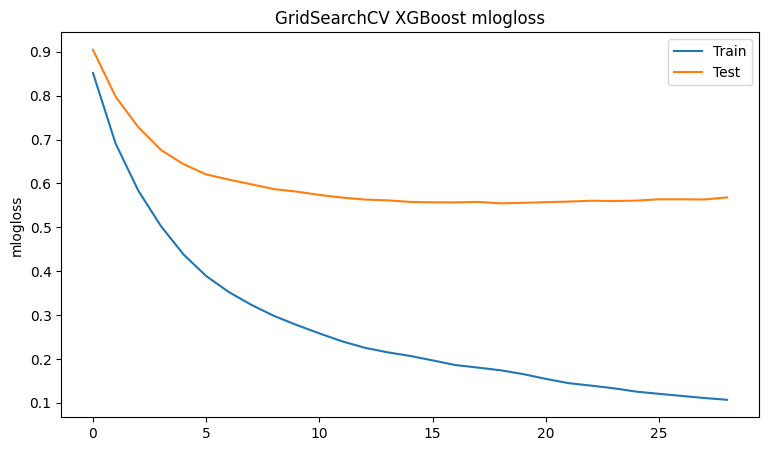

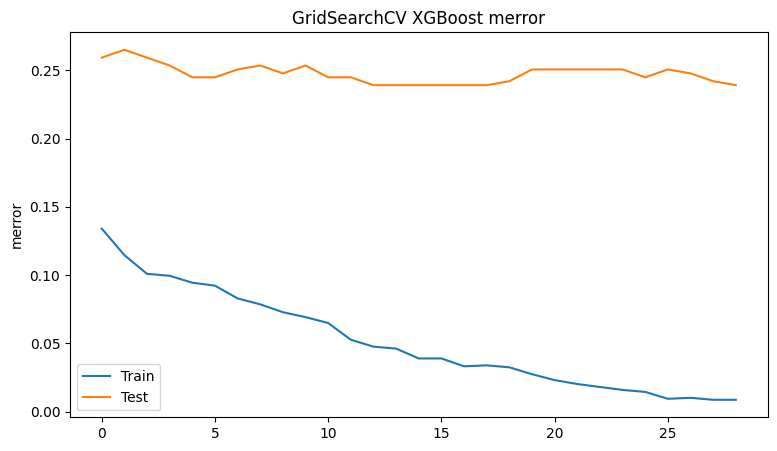


------------------ Confusion Matrix -----------------

[[ 87  27   0]
 [ 20 138  11]
 [  2  24  38]]

-------------------- Key Metrics --------------------

Accuracy: 0.76
Balanced Accuracy: 0.72

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.77
Macro Recall: 0.72
Macro F1-score: 0.74

Weighted Precision: 0.76
Weighted Recall: 0.76
Weighted F1-score: 0.76

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       114
           1       0.73      0.82      0.77       169
           2       0.78      0.59      0.67        64

    accuracy                           0.76       347
   macro avg       0.77      0.72      0.74       347
weighted avg       0.76      0.76      0.76       347

---------------------- XGBoost ----------------------


In [ ]:
## ---------- XGBoost model v1 ----------
## base run of model with default hyperparameters

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1, 
                            early_stopping_rounds=10, 
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling


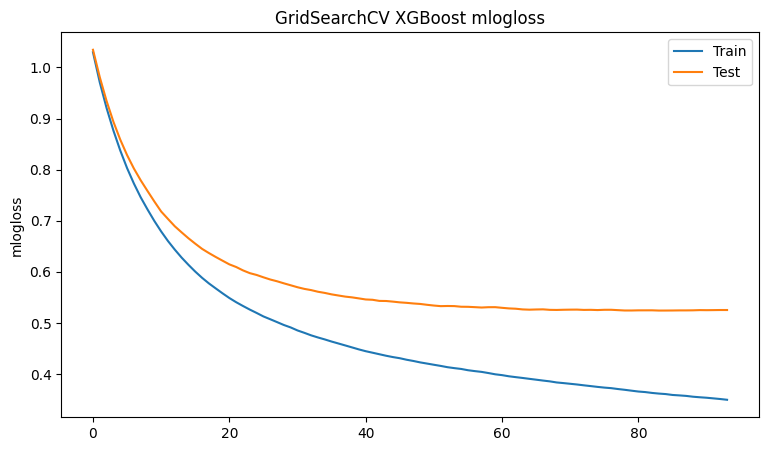

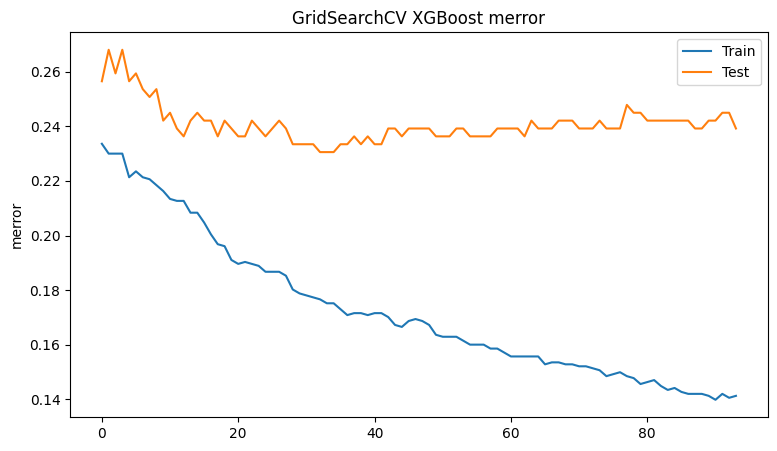


------------------ Confusion Matrix -----------------

[[ 88  26   0]
 [ 22 135  12]
 [  1  23  40]]

Accuracy: 0.76
Balanced Accuracy: 0.73

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.77
Macro Recall: 0.73
Macro F1-score: 0.75

Weighted Precision: 0.76
Weighted Recall: 0.76
Weighted F1-score: 0.76

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       114
           1       0.73      0.80      0.76       169
           2       0.77      0.62      0.69        64

    accuracy                           0.76       347
   macro avg       0.77      0.73      0.75       347
weighted avg       0.76      0.76      0.76       347

---------------------- XGBoost ----------------------


In [ ]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1, # default L2 value
                            subsample=1, # default subsample value
                            colsample_bytree=1, # default colsample_bytree value
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

In [ ]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 0 to 11238
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   review_count            1734 non-null   float64 
 1   company_size            1734 non-null   int32   
 2   company_revenue         1734 non-null   category
 3   company_industry        1734 non-null   int32   
 4   ceo_approve_percentage  1734 non-null   int64   
 5   company_founded         1734 non-null   float64 
 6   Average_rating_score    1734 non-null   float64 
 7   Average_rating          1734 non-null   int32   
 8   Happiness               1734 non-null   float64 
 9   Stress-free             1734 non-null   float64 
 10  Purpose                 1734 non-null   float64 
 11  Satisfaction            1734 non-null   float64 
 12  Flexibility             1734 non-null   float64 
 13  Achievement             1734 non-null   float64 
 14  Learning                1734

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7579250720461095

In [ ]:
to_predict_df['company_size'].value_counts()

company_size
0    619
3    546
6    252
7    144
5     88
1     50
8     24
4      6
2      5
Name: count, dtype: int64

In [ ]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 0 to 11238
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   review_count            1734 non-null   float64 
 1   company_size            1734 non-null   int32   
 2   company_revenue         1734 non-null   category
 3   company_industry        1734 non-null   int32   
 4   ceo_approve_percentage  1734 non-null   int64   
 5   company_founded         1734 non-null   float64 
 6   Average_rating_score    1734 non-null   float64 
 7   Average_rating          1734 non-null   int32   
 8   Happiness               1734 non-null   float64 
 9   Stress-free             1734 non-null   float64 
 10  Purpose                 1734 non-null   float64 
 11  Satisfaction            1734 non-null   float64 
 12  Flexibility             1734 non-null   float64 
 13  Achievement             1734 non-null   float64 
 14  Learning                1734

In [ ]:
to_predict_df['company_size'].value_counts()

company_size
0    619
3    546
6    252
7    144
5     88
1     50
8     24
4      6
2      5
Name: count, dtype: int64

In [ ]:
to_predict_df.drop(columns=['company_revenue'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22292\1036538737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_predict_df.drop(columns=['company_revenue'],inplace=True)


In [ ]:
to_predict_df[to_predict_df['ceo_approve_percentage']==0]

,review_count,company_size,company_revenue,company_industry,ceo_approve_percentage,company_founded,Average_rating_score,Average_rating,Happiness,Stress-free,...,Inclusion,Support,Appreciation,Energy,Compensation,Management,Trust,Belonging,min_max_revenue,rating_class
1,272.0,3,1B-5B,72,0,1984.0,74.0,0,4.0,2.0,...,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,1,1
4,186.0,6,Not Mentioned,101,0,1950.0,67.0,2,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,9,1
10,14.0,3,Not Mentioned,49,0,1948.0,77.0,3,4.0,5.0,...,4.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,9,1
17,122.0,7,100M-500M,41,0,1984.0,63.0,4,1.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0,0
24,120.0,6,500M-1B,54,0,1986.0,77.0,3,5.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11000,642.0,3,100M-500M,33,0,1930.0,80.0,3,5.0,5.0,...,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0,2
11061,129.0,7,100M-500M,20,0,1896.0,76.0,3,5.0,4.0,...,4.0,5.0,5.0,4.0,2.0,5.0,4.0,5.0,0,2
11072,46.0,3,Not Mentioned,23,0,2005.0,65.0,2,3.0,1.0,...,4.0,4.0,5.0,3.0,1.0,3.0,4.0,3.0,9,0
11234,282.0,3,1B-5B,72,0,1956.0,69.0,1,3.0,2.0,...,3.0,2.0,3.0,2.0,4.0,3.0,3.0,2.0,1,0


In [ ]:
to_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 0 to 11238
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_count            1734 non-null   float64
 1   company_size            1734 non-null   int32  
 2   company_industry        1734 non-null   int32  
 3   ceo_approve_percentage  1734 non-null   int64  
 4   company_founded         1734 non-null   float64
 5   Average_rating_score    1734 non-null   float64
 6   Average_rating          1734 non-null   int32  
 7   Happiness               1734 non-null   float64
 8   Stress-free             1734 non-null   float64
 9   Purpose                 1734 non-null   float64
 10  Satisfaction            1734 non-null   float64
 11  Flexibility             1734 non-null   float64
 12  Achievement             1734 non-null   float64
 13  Learning                1734 non-null   float64
 14  Inclusion               1734 non-null   floa